# Projeto 3 de Ciência dos Dados

## Grupo:
    Lucas Hix
    Andrea Tessler
    Celso Diniz

# Objetivos:

* Analise do preço por genero ok
* Analise do ganho(preço * donos) por sua avaliação
* Analise do tempo médio passando dentro do jogo por sua avaliação
* Analise das avaliações por genero ok
* Analise de media de minutos dentro do jogo por tipo de categoria ok

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('steam.csv')
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [3]:
data['rating'] = data['positive_ratings'] - data['negative_ratings']

In [4]:
new_owners = []

for x in data['owners']:
    new_owners.append(int(x.split('-')[0]))
    
data['profit'] = new_owners * data['price']
data.head(1)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,rating,profit
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,121195,71900000.0


In [5]:
result = []
for x in data['genres']:
    result.extend(x.split(";"))
result = set(result)
generos = []
generos.extend(result)

In [6]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["price"].mean())
print(result)

[2.91, 6.9445607013534305, 5.972104283053982, 26.788823529411776, 26.817241379310317, 6.228351126927571, 39.69607142857143, 4.320110650069142, 6.121800239234548, 11.253448275862072, 14.392671232876715, 31.80225806451613, 14.64333333333333, 7.050117187499913, 7.039631008801699, 4.1061949069541726, 3.98, 5.049866639204594, 6.846612244897962, 6.942147993505151, 7.285977443609022, 7.8779349470499085, 11.322368421052635, 0.09916666666666663, 3.98, 7.2089834424338335, 61.68, 6.140368814584433, 27.726962025316446]


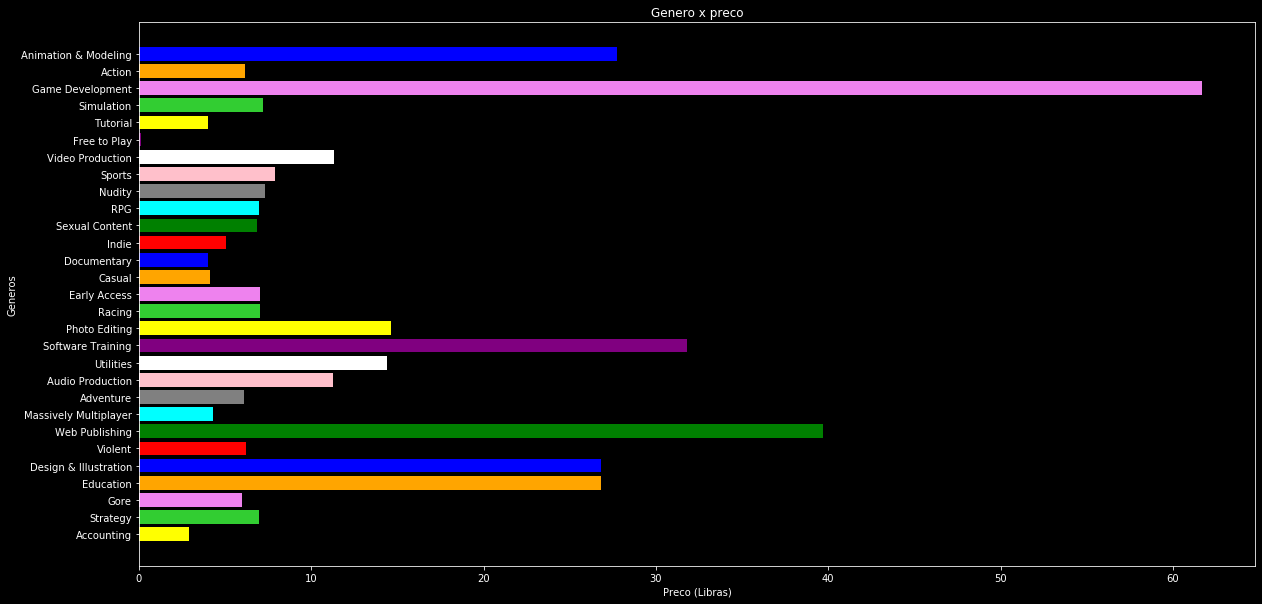

In [7]:
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('dark_background')
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.title('Genero x preco')
plt.xlabel('Preco (Libras)') # em libras
plt.ylabel('Generos')
#plt.grid(True)
plt.show()

In [8]:
result = []
for x in data['categories']:
    result.extend(x.split(";"))
result = set(result)
categorias = []
categorias.extend(result)
print(categorias)

['Captions available', 'Online Co-op', 'Steam Trading Cards', 'MMO', 'Shared/Split Screen', 'Mods', 'Mods (require HL2)', 'Steam Workshop', 'Steam Achievements', 'Includes level editor', 'Cross-Platform Multiplayer', 'Local Multi-Player', 'Online Multi-Player', 'Steam Cloud', 'Single-player', 'Commentary available', 'Steam Turn Notifications', 'Valve Anti-Cheat enabled', 'Full controller support', 'Local Co-op', 'Partial Controller Support', 'Co-op', 'VR Support', 'SteamVR Collectibles', 'In-App Purchases', 'Stats', 'Steam Leaderboards', 'Includes Source SDK', 'Multi-player']


In [9]:
result = []
for x in categorias:
    subtabela = data[data['categories'].str.contains(x)]
    result.append(subtabela["average_playtime"].mean())
print(result)

/Users/celso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


[395.22052704576976, 393.95891690009336, 275.6592573882294, 1028.7814726840854, 114.52369888475836, 532.5, nan, 630.9520624303233, 165.3459306440198, 359.753861003861, 536.4477335800185, 122.07616099071207, 295.8564535585042, 195.9634298379277, 132.82989329387024, 434.34722222222223, 88.0952380952381, 2094.68085106383, 145.72361720807726, 89.7610953729934, 187.27231931979216, 359.7642089093702, 308.2597402597403, 656.95, 575.6492753623188, 232.48615548455805, 166.54027333527188, 896.1142857142858, 371.2931555108203]


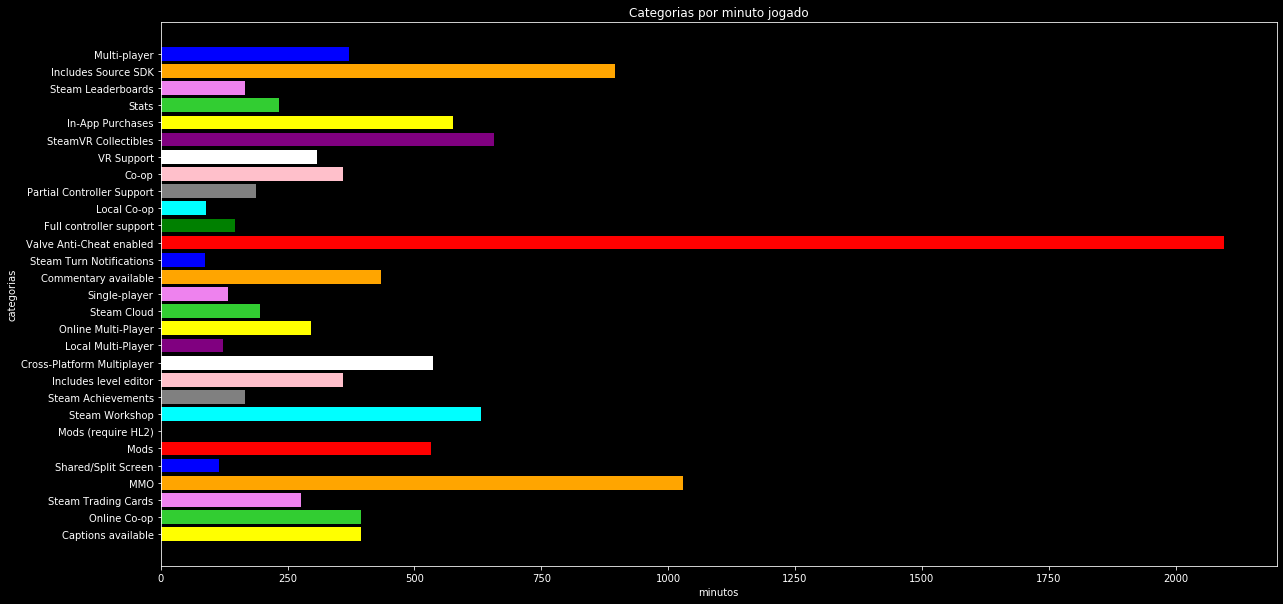

In [10]:
plt.barh(categorias, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('minutos')
plt.ylabel('categorias')
plt.title('Categorias por minuto jogado');

In [11]:
result = []
for x in generos:
    subtabela = data[data['genres'].str.contains(x)]
    result.append(subtabela["rating"].mean())
print(result)

[2.3333333333333335, 683.779493043644, 200.1024208566108, 48.35294117647059, 828.551724137931, 173.36654804270464, 288.14285714285717, 1584.0235131396958, 636.6733452950558, 31.862068965517242, 526.0616438356165, 61.935483870967744, 53.083333333333336, 525.2490234375, 266.3500338524035, 225.1794319294809, 0.0, 448.79856855980637, 429.2122448979592, 1068.1902110879146, 610.1691729323309, 383.3343419062027, 474.3157894736842, 3445.81103286385, 0.0, 653.1420870234887, 64.70588235294117, 1225.1689490044528, 1054.7848101265822]


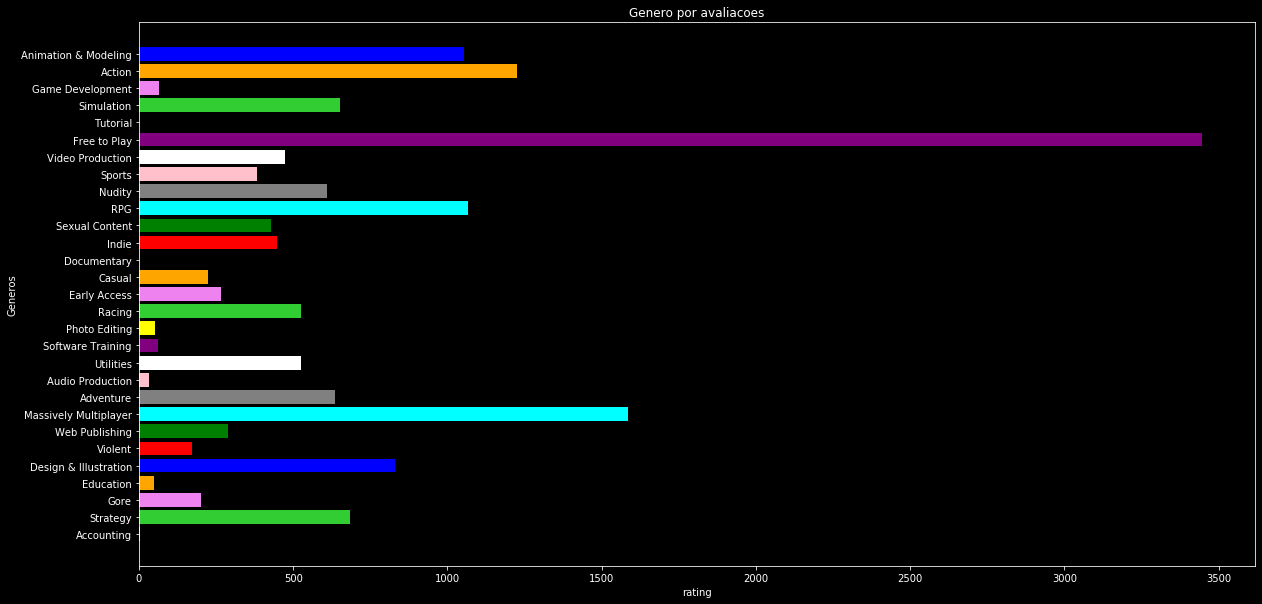

In [12]:
plt.barh(generos, result, color = ('yellow', 'limegreen', 'violet', 'orange', 'blue', 'red', 'green','cyan','gray', 'pink','white', 'purple'))
plt.xlabel('rating')
plt.ylabel('Generos')
plt.title('Genero por avaliacoes');

In [13]:
 #Analise do tempo médio passando dentro do jogo por sua avaliação
#falta graficos colorido


In [14]:
# Analise do ganho(preço * donos) por sua avaliação

# inicio do processamento de dados

In [15]:
# bibliotecas necessarias para esta segunda parte do projeto:
import numpy as np
# Tirar warnigns
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Abre o CSV em um DataFrame
data = pd.read_csv('steam.csv')

# Remove identificador interno do jogo na steam
data = data.drop(columns="appid")

# Transforma todas as strings dentro do dataframe em minusculo
for coluna in ["developer", "publisher", "platforms", "categories", "genres", "steamspy_tags"]:
    data[coluna] = data[coluna].str.lower()

# Printa um exemplo
data.head(1)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,Counter-Strike,2000-11-01,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19


In [17]:
# Separa a quantidade de pessoas que possuim o jogo em seu maximo e minimo

# Lista de suporte
owners_min = []
owners_max = []

# Itera sobre os valores das quatidades
for amount in data["owners"]:
    # Separa os valores de minimo e maximo
    amounts = amount.split("-")
    
    # Adiciona o valor respectivo a lista
    owners_min.append(int(amounts[0]))
    owners_max.append(int(amounts[1]))

# Gera as duas novas colunas
data["owners min"] = owners_min    
data["owners max"] = owners_max

# Remove coluna antiga
data = data.drop(columns="owners")

# Printa um exemplo
data.head(1)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,owners max
0,Counter-Strike,2000-11-01,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,7.19,10000000,20000000


In [18]:
# Separa a data em ano dia e mês

# Listas de suporte
year = []
month = []
day = []

# Itera sobre a data de lancemento
for time in data["release_date"]:
    # Separa em seus valores
    times = time.split("-")
    
    # Separa em ano mês e dia
    year.append(times[0])
    month.append(times[1])
    day.append(times[2])

# Gera as novas colunas
data["release_year"] = year
data["release_month"] = month
data["release_day"] = day

# Remove coluna antiga
data = data.drop(columns="release_date")

# Printa um exemplo
data.head(1)

,name,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners min,owners max,release_year,release_month,release_day
0,Counter-Strike,1,valve,valve,windows;mac;linux,0,multi-player;online multi-player;local multi-p...,action,action;fps;multiplayer,0,124534,3339,17612,317,7.19,10000000,20000000,2000,11,01


In [19]:
'''
# Transforma todas as colunas quali em dummy

for quali in ["platforms","categories","genres", "steamspy_tags"]:
    new_c = 0
    
    # Para cada elemento da coluna quali
    for element in set(data[quali].str.cat(sep=";").split(";")):
        # Verfica para eveitar duplicatas (SteamSpy)
        if element not in data: 
        # Transforma em uma coluna dummy
            data[element] = np.where(data[quali].str.contains(element), 1, 0)
            new_c += 1
    
    print("Coluna Quali \"{0}\" processada, gerando {1} colunas dummy".format(quali, new_c))
    data = data.drop(columns=quali)
    
data.head(1)
'''


'\n# Transforma todas as colunas quali em dummy\n\nfor quali in ["platforms","categories","genres", "steamspy_tags"]:\n    new_c = 0\n    \n    # Para cada elemento da coluna quali\n    for element in set(data[quali].str.cat(sep=";").split(";")):\n        # Verfica para eveitar duplicatas (SteamSpy)\n        if element not in data: \n        # Transforma em uma coluna dummy\n            data[element] = np.where(data[quali].str.contains(element), 1, 0)\n            new_c += 1\n    \n    print("Coluna Quali "{0}" processada, gerando {1} colunas dummy".format(quali, new_c))\n    data = data.drop(columns=quali)\n    \ndata.head(1)\n'

In [20]:
'''
# Separa os desenvolvedores e publicadores

options = []
options.extend(data["developer"].str.cat(sep=";").split(";"))
options.extend(data["publisher"].str.cat(sep=";").split(";"))

new_c = 0
error = 0

for quali in set(options):
    if quali not in data:
        try:
            data[quali] = np.where(data["publisher"].str.contains(quali) | data["developer"].str.contains(quali), 1, 0)
            new_c += 1
        except:
            print("ANTI-BUG: Ignorando Linha \"{0}\"".format(quali))
            print()
            error += 1
    
print("Desenvolvedores e publicadores processados, gerando {0} colunas dummy com {1} linhas puladas".format(new_c, error))

data = data.drop(columns="developer")
data = data.drop(columns="publisher")

data.head(1)
'''


'\n# Separa os desenvolvedores e publicadores\n\noptions = []\noptions.extend(data["developer"].str.cat(sep=";").split(";"))\noptions.extend(data["publisher"].str.cat(sep=";").split(";"))\n\nnew_c = 0\nerror = 0\n\nfor quali in set(options):\n    if quali not in data:\n        try:\n            data[quali] = np.where(data["publisher"].str.contains(quali) | data["developer"].str.contains(quali), 1, 0)\n            new_c += 1\n        except:\n            print("ANTI-BUG: Ignorando Linha "{0}"".format(quali))\n            print()\n            error += 1\n    \nprint("Desenvolvedores e publicadores processados, gerando {0} colunas dummy com {1} linhas puladas".format(new_c, error))\n\ndata = data.drop(columns="developer")\ndata = data.drop(columns="publisher")\n\ndata.head(1)\n'

In [21]:
'''
# Salva o DataFram para um CSV

data.to_csv("steam_teste.csv")

print("CSV SALVADO!")
'''


'\n# Salva o DataFram para um CSV\n\ndata.to_csv("steam_teste.csv")\n\nprint("CSV SALVADO!")\n'

# Parte 3: 
* apos o processamento inicial, vamos dar inicio a analise de X e Y (explicar o que e o y depois), regressao simples

In [28]:
# bibliotecas utilizadas nesta 3a parte

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
import numpy as np
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [49]:
'''
# funcao para regressao linear simples
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results
'''
#Para analise:
#* X:positive_ratings, negative_ratings, price
#* Y: tudo menos X + name, developer e publisher
#* X = playtime

'\n# funcao para regressao linear simples\ndef regress(X,Y):\n    X_cp = sm.add_constant(X)\n    model = sm.OLS(Y,X_cp)\n    results = model.fit()\n    return results\n'

In [24]:
#beta^0 e beta^1 de ratings positivos
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['positive_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 471.32611908127353
beta1: 87.07067856993659


In [25]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

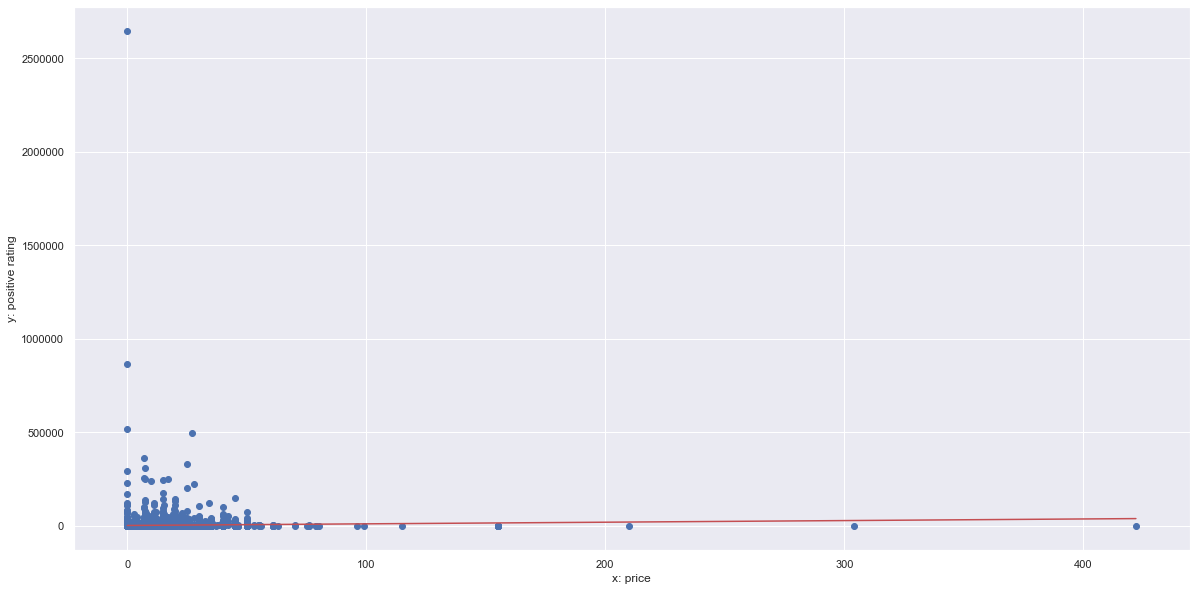

In [29]:
# arrumar grafico
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: positive rating");

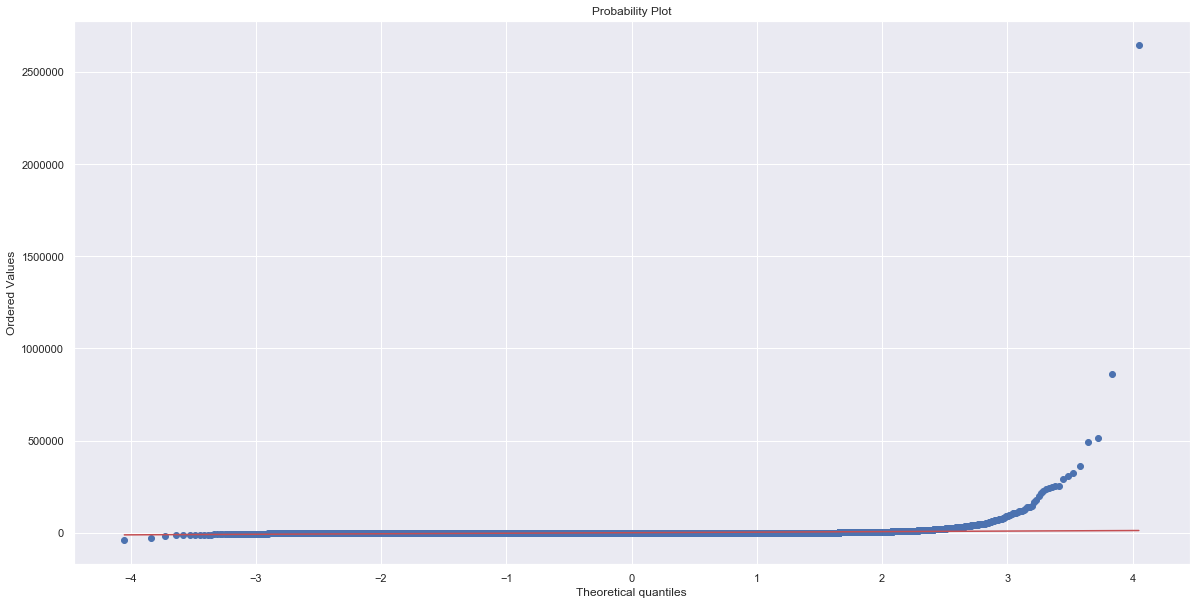

In [31]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - possui outliers

In [32]:
import statsmodels.api as sm # Importe da biblioteca

x = df['price'] # Definindo renda como explicativa
y = df['positive_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       positive_ratings   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     35.35
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           2.79e-09
Time:                        22:25:16   Log-Likelihood:            -3.0513e+05
No. Observations:               27075   AIC:                         6.103e+05
Df Residuals:                   27073   BIC:                         6.103e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        471.3261    145.687      3.235      0.001     185.772     756.880
price         87.0707     14.645      5.945      0.000      58.365     115.776
==============================================================================
Omnibus:                   109697.248   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     225381231601.452
Skew:                         106.361   Prob(JB):                         0.00
Kurtosis:                   14135.893   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

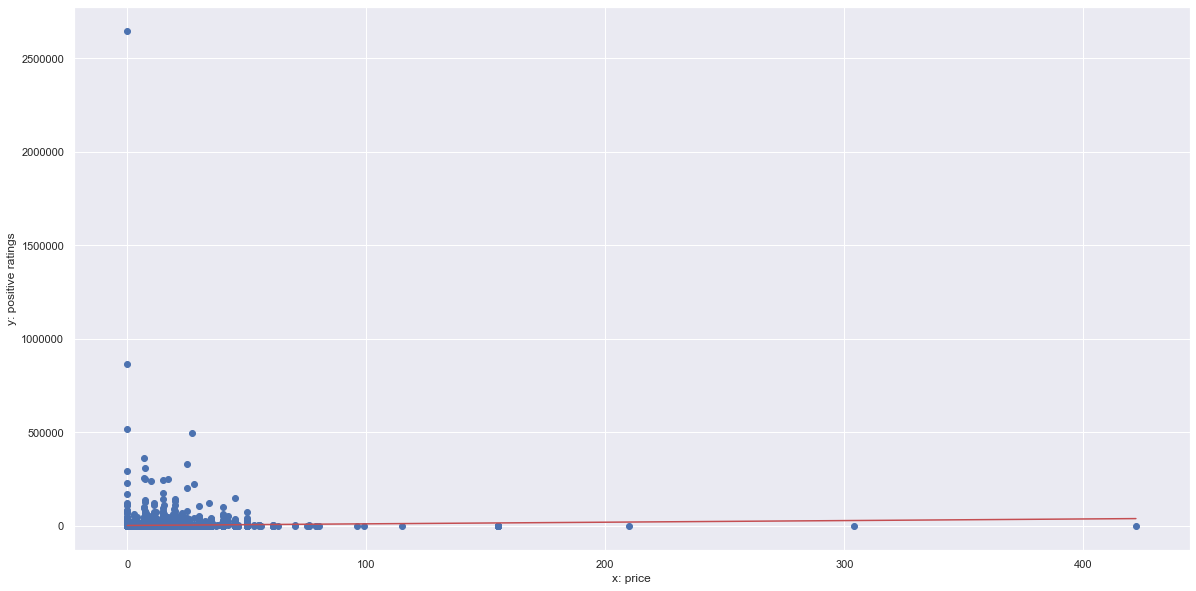

In [33]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

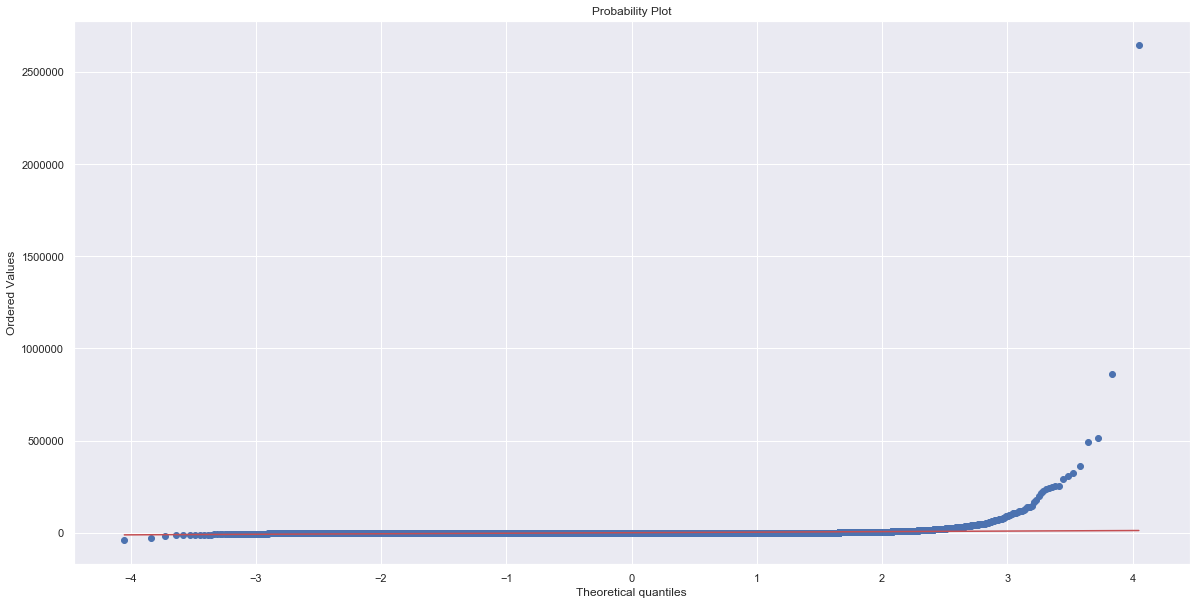

In [34]:
stats.probplot(results.resid, dist="norm", plot=plt);

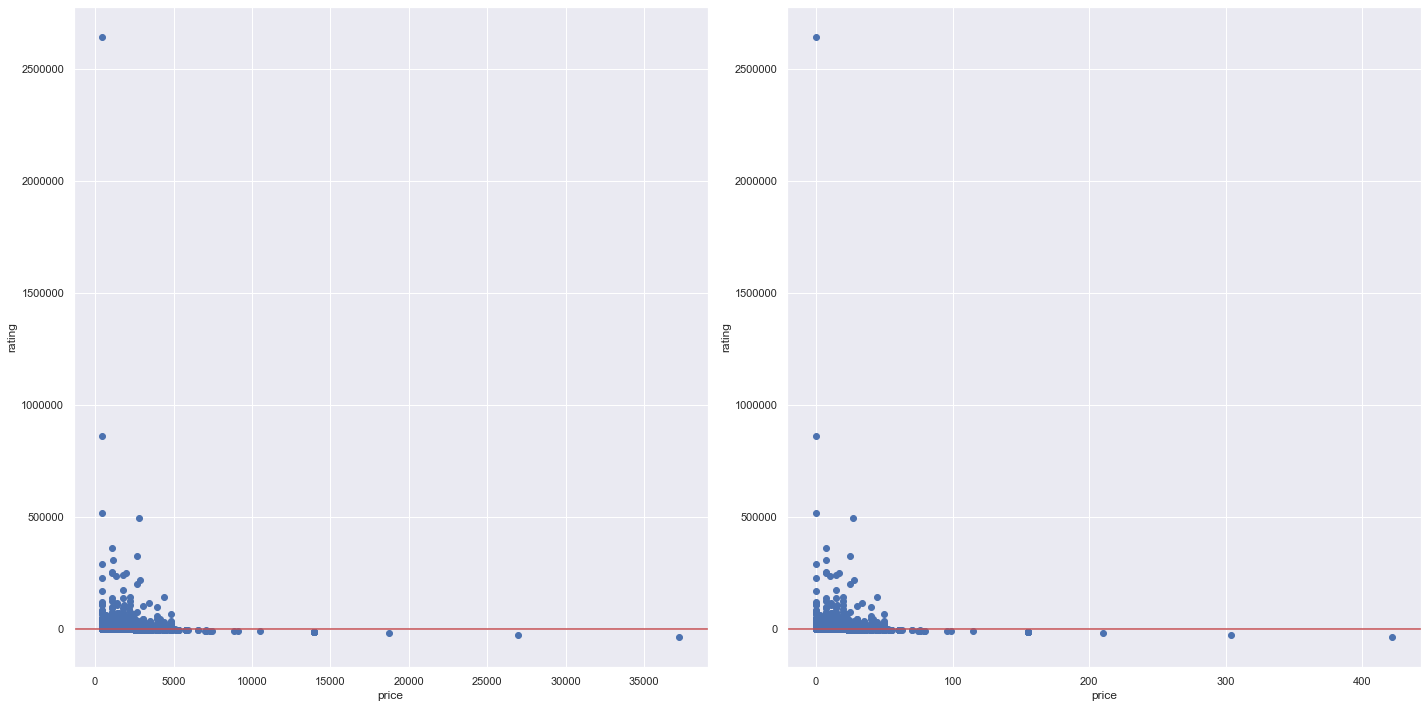

In [38]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# regressao simples de rating negativos

In [40]:
#beta^0 e beta^1
df =  pd.read_csv('steam_processada_parcial.csv')
x = df['price']# pegar somente 30 linhas
y = df['negative_ratings']

yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

beta0: 41.49947809720945
beta1: 27.891128836445176


In [41]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v

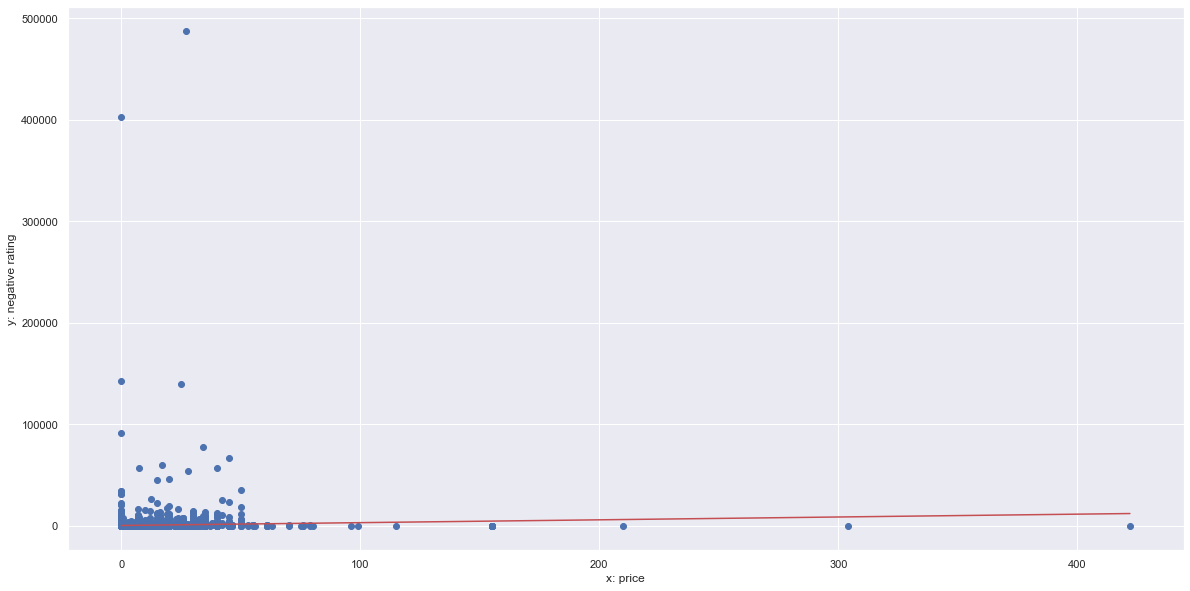

In [42]:
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y); # dados
plt.xlabel("x: price");
plt.ylabel("y: negative rating");

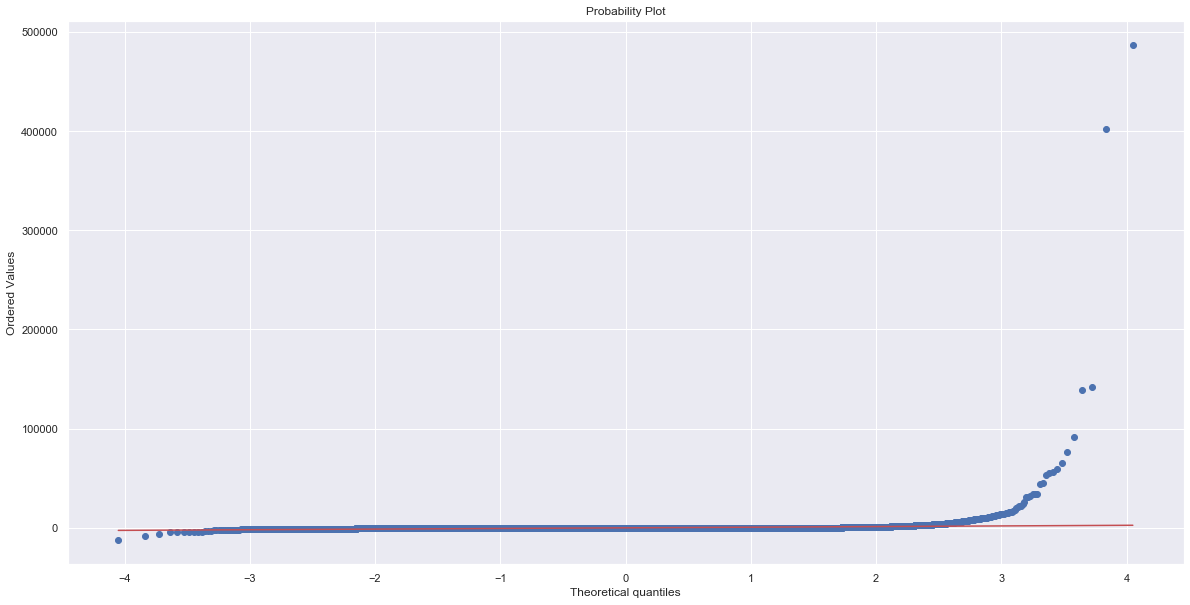

In [43]:
e = y - (b0 + b1*x) # Escreva sua fórmula dos resíduos aqui

stats.probplot(e, dist='norm', plot=plt); # Verifique graficamente  se é uma normal - como fazer isso?

In [44]:
x = df['price'] # Definindo renda como explicativa
y = df['negative_ratings']    # Definindo CO2 como resposta

xc = sm.add_constant(x) # Adiciona coluna de 1s para estimar intercepto
model = sm.OLS(y,xc)    # Define o modelo
results = model.fit()   # Faz o ajuste
results.summary()       # Mostra os resultados

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       negative_ratings   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     71.32
Date:                Thu, 21 Nov 2019   Prob (F-statistic):           3.19e-17
Time:                        22:28:51   Log-Likelihood:            -2.6481e+05
No. Observations:               27075   AIC:                         5.296e+05
Df Residuals:                   27073   BIC:                         5.296e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4995     32.853      1.263      0.207     -22.895     105.894
price         27.8911      3.303      8.445      0.000      21.418      34.364
==============================================================================
Omnibus:                   103499.078   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      94397338898.114
Skew:                          88.788   Prob(JB):                         0.00
Kurtosis:                    9148.752   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

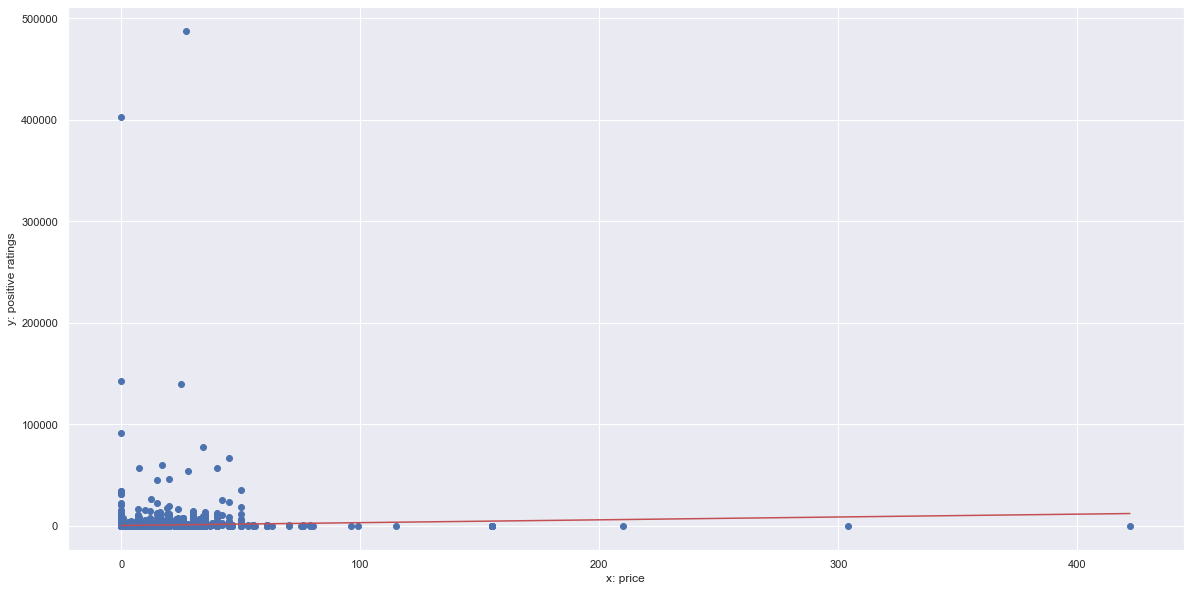

In [45]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);
plt.xlabel("x: price");
plt.ylabel("y: positive ratings");

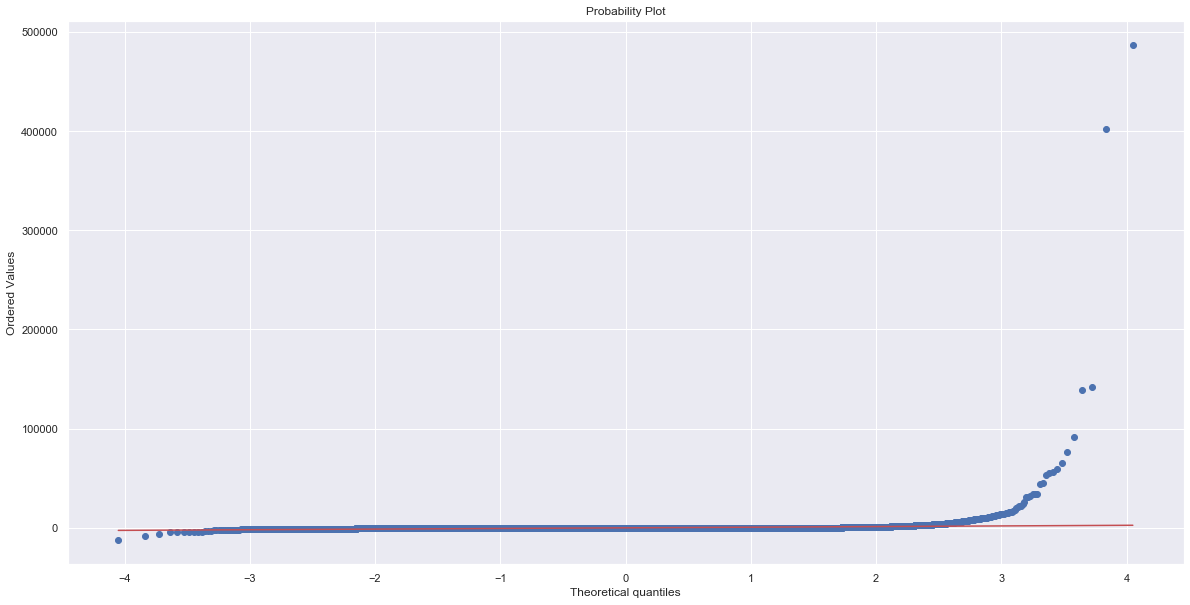

In [46]:
stats.probplot(results.resid, dist="norm", plot=plt);

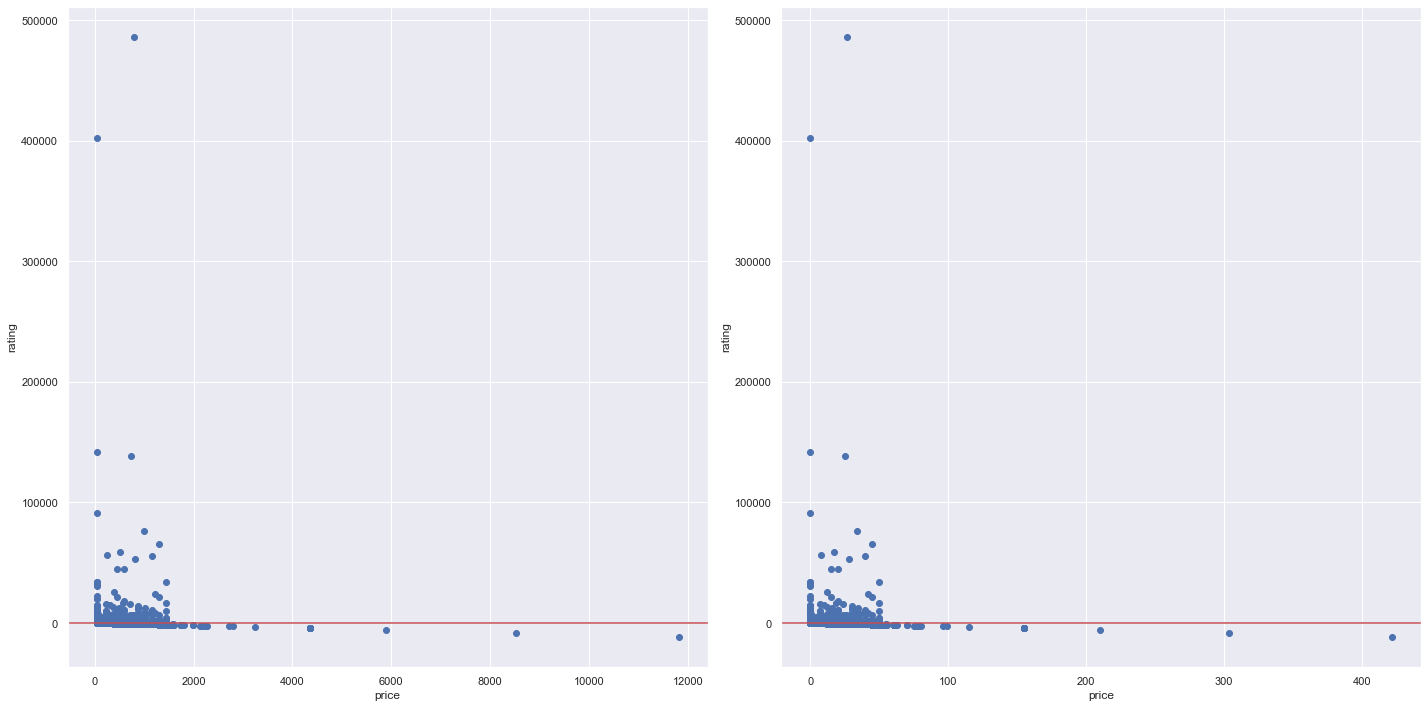

In [48]:
fig = plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(results.predict(xc),results.resid); #xc contem matriz de planejamento usada no ajuste OLS 
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.subplot(122)
plt.scatter(x,results.resid); #x contem apenas a variável independente utilizada no ajuste linear
plt.axhline(y=0, color='r', linestyle='-');
plt.ylabel('rating')
plt.xlabel('price')

plt.tight_layout()
plt.show()

# Parte 4: regressao multipla

In [52]:
# bibliotecas para a parte 4
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import probplot, norm, t
import seaborn as sns
sns.set(rc={'figure.figsize':(100,10)})
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm # Importe da biblioteca

sns.set()

In [53]:
### Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [54]:
data = pd.read_csv('steam_processada_parcial.csv')

In [55]:
Y = data['price']
lista_x = list(data.columns)
lista_x.remove("Unnamed: 0")
lista_x.remove("price")
lista_x.remove("developer")
lista_x.remove("publisher")
lista_x.remove("name")
X=data[lista_x]
X.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,god game,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon
0,1,0,0,124534,3339,17612,317,10000000,20000000,2000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,3318,633,277,62,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3416,398,187,34,5000000,10000000,2003,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1273,267,258,184,5000000,10000000,2001,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,5250,288,624,415,5000000,10000000,1999,...,0,0,0,0,0,0,0,0,0,0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [57]:
results = regress(X_train,Y_train)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     25.44
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:38:00   Log-Likelihood:                -72247.
No. Observations:               21660   AIC:                         1.452e+05
Df Residuals:                   21283   BIC:                         1.483e+05
Df Model:                         376                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -555.4518     55.943     -9.929      0.000    -665.104    -445.800
english                              -0.0432      0.357     -0.121      0.904      -0.743       0.656
required_age                          0.1941      0.021      9.440      0.000       0.154       0.234
achievements                       9.143e-05      0.000      0.683      0.495      -0.000       0.000
positive_ratings                  -7.284e-06   3.89e-06     -1.874      0.061   -1.49e-05    3.36e-07
negative_ratings                      0.0001    2.1e-05      6.358      0.000    9.25e-05       0.000
average_playtime                   6.694e-05   6.39e-05      1.047      0.295   -5.84e-05       0.000
median_playtime                    2.694e-05   4.81e-05      0.560      0.576   -6.74e-05       0.000
owners min                        -2.084e-06   9.07e-07     -2.296      0.022   -3.86e-06   -3.05e-07
owners max                         7.015e-07   4.03e-07      1.739      0.082   -8.92e-08    1.49e-06
release_year                          0.2763      0.028      9.986      0.000       0.222       0.331
release_month                         0.0392      0.014      2.821      0.005       0.012       0.066
release_day                           0.0115      0.005      2.164      0.030       0.001       0.022
mac                                   0.3367      0.136      2.467      0.014       0.069       0.604
windows                               1.8764      3.081      0.609      0.542      -4.162       7.915
linux                                -0.5072      0.158     -3.220      0.001      -0.816      -0.198
co-op                                 0.9081      0.311      2.924      0.003       0.299       1.517
steam trading cards                   0.6506      0.120      5.432      0.000       0.416       0.885
shared/split screen                   0.0215      0.239      0.090      0.928      -0.446       0.489
stats                                -0.4743      0.201     -2.365      0.018      -0.867      -0.081
mods                                 -3.2274      5.128     -0.629      0.529     -13.278       6.824
steam leaderboards                   -0.1185      0.162     -0.729      0.466      -0.437       0.200
partial controller support            0.7386      0.143      5.164      0.000       0.458       1.019
valve anti-cheat enabled              4.3490      0.918      4.735      0.000       2.549       6.149
mmo                                  -0.0381      0.548     -0.070      0.945      -1.112       1.035
steam cloud                           1.6428      0.124     13.262      0.000       1.400       1.886
includes source sdk                   0.0023      1.408      0.002      0.999      -2.757       2.762
full controller support

In [58]:
X_test.shape

(5415, 382)

In [59]:
X_test_const = sm.add_constant(X_test)
X_test_const["const"]=1
X_test_const.head()

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners min,owners max,release_year,...,top-down,character customization,real-time with pause,bikes,survival,underwater,1980s,time management,mystery dungeon,const
151,1,0,0,575,55,801,801,100000,200000,2009,...,0,0,0,0,0,0,0,0,0,1
16974,1,0,1,14,13,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
11436,1,0,9,19,15,0,0,0,20000,2016,...,0,0,0,0,0,0,0,0,0,1
16469,1,0,0,2,0,0,0,0,20000,2017,...,0,0,0,0,0,0,0,0,0,1
759,1,0,47,5336,903,1834,2894,1000000,2000000,2010,...,0,0,0,0,0,0,0,0,0,1


In [60]:
y_pred = results.predict(X_test_const)

In [61]:
from sklearn.metrics import mean_squared_error
print('Acurácia: {}'.format(mean_squared_error(Y_test, y_pred)))

Acurácia: 287886.9963673384


In [63]:
# negativo devido a alguns outliers
from sklearn.metrics import r2_score
print('Acurácia: {}'.format(r2_score(Y_test, y_pred)))

Acurácia: -6831.413665165799


In [64]:
from sklearn.metrics import mean_absolute_error
print('Acurácia: {}'.format(mean_absolute_error(Y_test, y_pred)))

Acurácia: 530.2146439830018


In [65]:
from sklearn.metrics import median_absolute_error
print('Acurácia: {}'.format(median_absolute_error(Y_test, y_pred)))

Acurácia: 543.9951796077721


In [75]:
# o que e r2: porcentagem de y explicado pelos regressores utilizados
a = data
a.to_excel('teste.xlsx')


# parte 5: desision tree

In [76]:

import pandas as pd

from sklearn.tree import DecisionTreeRegressor # arvore de desições
from sklearn.model_selection import train_test_split # separador

import warnings

warnings.filterwarnings('ignore')

In [77]:
data = pd.read_excel('teste.xlsx') # le os dados
data = data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"]) # remove colunas criadas pelo excel
data = data.set_index("name") # renomeia o index para o nome do jogo

data.head(1) # visulaizar brevemente os dados obtidos

KeyError: "['Unnamed: 0' 'Unnamed: 0.1'] not found in axis"

In [ ]:
X = data.loc[:, ["positive_ratings", "negative_ratings", "average_playtime", "price"]] # Os X escolidos
y = data

y = y.drop(columns=["developer", "publisher"]) # remove colunas invalidas

y.head(1) # printa pequeno exemplo

In [ ]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% treino e 30% teste

In [ ]:
# Cria o classificador
clf = DecisionTreeRegressor()

# Treina o classificador
clf = clf.fit(X_train, y_train)

In [ ]:
# Calcula a acuracia do classificador
print("Accuracy:", clf.score(X_test, y_test))